# Задача 7. Неоднородная модель Изинга II.

Исследовать зависимость критической температуры в неоднородной модели Изинга в зависимости от величины магнитного поля. Использовать следующие величины для горизонтального и вертикального обменных параметров: $$ J_h = 1, \; J_v = 0.8, 1, 1.2 $$
Размер решётки $$ 32 \times 32$$

## Алгоритм реализации модели Изинга методом Монте-Карло 

1. Создать двумерный массив - решётку спинов со случайной ориентацией спинов.
2. Случаным образом выбрать одну из ячеек решётки.
3. Вычислить энергии конфигураций при заполнении этой клетки спином вверх и вниз.
4. Если энергия нового состояния меньше энергии старого, принять новую конфигурацию. Иначе, принять новую конфигурацию с вероятностью P: $$P = e^{-\frac{E}{T}}$$
5. Повторять шаги 2, 3, 4 достаточное количество раз.


Алгоритм реализован на языке Python.

Для рассчёта необходимо подключить модуль `ising_mc`:
```python
from ising_mc import IsingMC
```
Инициализировать класс `IsingMC`:
```python
system = IsingMC(size=32, T=3, Jh=1, Jv=1, Hmag=0.5)
```
Запустить расчёт:
```python
system.run(1000000)
```



In [143]:
import numpy as np
import matplotlib.pyplot as plt

from ising_mc import IsingMC

plt.rcParams.update({'font.size': 14})

Пробный запуск расчёта:

In [144]:
system = IsingMC(size=32, T=3, Jh=1, Jv=1, Hmag=0.5)
system.run(1000000)

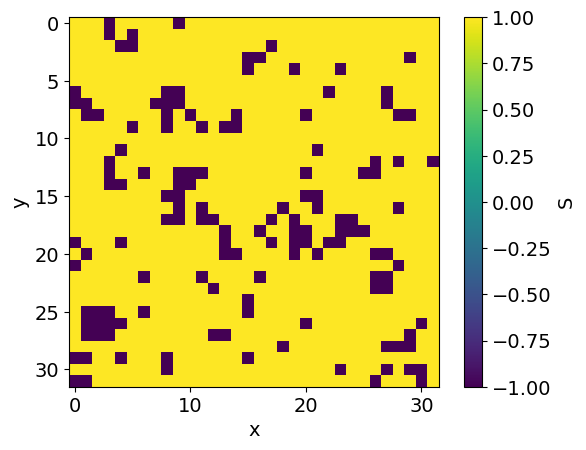

In [145]:
fig, ax = plt.subplots()
plt.imshow(system.state)
ax.set_xlabel('x')
ax.set_ylabel('y')
cbar = plt.colorbar()
cbar.ax.set_ylabel('S')
plt.show()

Величины вертикального и горизонтального обменных параметров - положительные числа. Учитывая знак минус перед первой частью гамильтонниана: $$ H = - \sum_{\left< i, j \right>} J_{ij}S_i S_j - H_{mag} \sum_i S_i $$ можно сделать вывод, что рассматриваемые системы ферромагнитные. Таким образом, для определения зависимости критической температуры от магнитного поля и вертикального обменного параметра, можно использовать намагниченность. При увеличении температуры, в момент перехода через критическую точку, намагниченность ферромагнитной системы должна резко упасть.

Все расчёты выполнены в относительных энергетических единицах.

Расчёт намагниченности для различных конфигураций температуры и магнитного поля выполняется в файле `crytical_temperature.py`. Для запуска программы необходимо вручную задать параметры системы. Запуск программы:

`python crytical_temperature.py`

Намагниченность системы в развертке по температуре и магнитному полю для разных вертикальных обменных параметров записываются в бинарный файл `magnetization_Jv_<Jv>.npy`, содержащий `np.ndarray` объект. Развёртка по магнитному полю находится на 0 оси, по температуре на 1 оси.

In [146]:
Hmag = np.arange(0.05, 1.01, 0.05)
temp = np.arange(0.1, 10, 0.1)

magn_08 = np.load('magnetization_Jv_0.8.npy')
magn_10 = np.load('magnetization_Jv_1.0.npy')
magn_12 = np.load('magnetization_Jv_1.2.npy')

Построим карту намагниченности в развёртке по магнитному полю и по температуре:

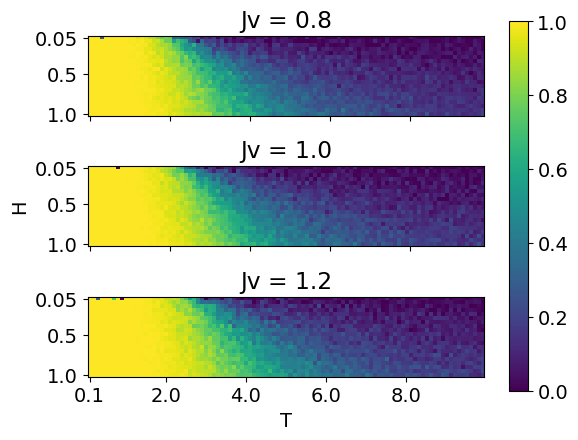

In [147]:
fig, axs = plt.subplots(3, 1)

images = [
axs[0].imshow(magn_08),
axs[1].imshow(magn_10),
axs[2].imshow(magn_12)
]

for ax in axs:
    ax.set_yticks([0, 9, 19])
    ax.set_yticklabels(Hmag[[0, 9, 19]])
    ax.label_outer()
plt.xticks([0, 19, 39, 59, 79], temp[[0, 19, 39, 59, 79]])

axs[2].set_xlabel('T')
axs[1].set_ylabel('H')

axs[0].title.set_text('Jv = 0.8')
axs[1].title.set_text('Jv = 1.0')
axs[2].title.set_text('Jv = 1.2')

fig.colorbar(images[0], ax=axs)
for im in images:
    im.set_clim(0, 1)

Выделим фазы системы с порогом по намагниченности: $$ M = 0.8 $$ и получим следующие фазовые диаграммы:

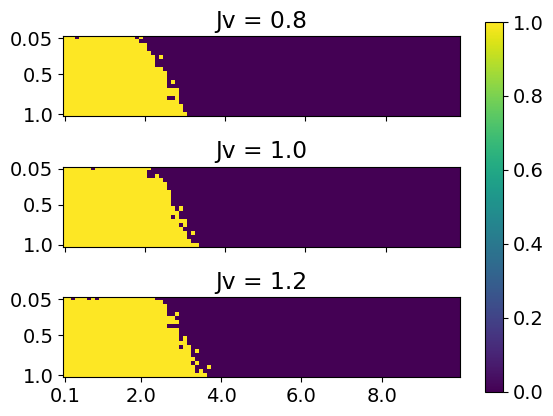

In [148]:
magn_08[magn_08 < 0.8] = 0
magn_10[magn_10 < 0.8] = 0
magn_12[magn_12 < 0.8] = 0

magn_08[magn_08 > 0.8] = 1
magn_10[magn_10 > 0.8] = 1
magn_12[magn_12 > 0.8] = 1

fig, axs = plt.subplots(3, 1)

images = [
axs[0].imshow(magn_08),
axs[1].imshow(magn_10),
axs[2].imshow(magn_12)
]

for ax in axs:
    ax.set_yticks([0, 9, 19])
    ax.set_yticklabels(Hmag[[0, 9, 19]])
    ax.label_outer()
plt.xticks([0, 19, 39, 59, 79], temp[[0, 19, 39, 59, 79]])

fig.colorbar(images[0], ax=axs)
for im in images:
    im.set_clim(0, 1)
    
axs[0].title.set_text('Jv = 0.8')
axs[1].title.set_text('Jv = 1.0')
axs[2].title.set_text('Jv = 1.2')



Как можно видеть, с ростом магнитного поля фазовая граница сдвигается дальше по температуре. Это объясняется тем, что температурное и магнитное воздействие на систему являются конкурирующими разупорядочивающим и упорядочивающим взаимодейсвиями соответственно. Таким образом, при увеличении энергетического воздействия магнитного поля на систему, для того, чтобы сломать её порядок, требуется большее температурное воздействие.

Такая же связь наблюдается и с обменными взаимодействиями. При увеличении обменного интеграла, требуется большая температура для разрушения связей. Как можно видеть и графика ниже, фазовая граница "отодвигается" от фиксированной линии с увеличением величины обменного взаимодействия

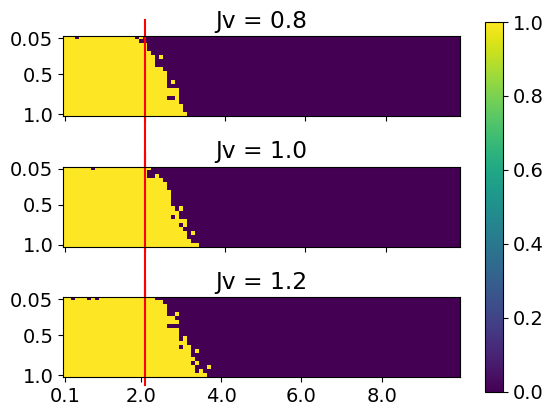

In [149]:
magn_08[magn_08 < 0.8] = 0
magn_10[magn_10 < 0.8] = 0
magn_12[magn_12 < 0.8] = 0

magn_08[magn_08 > 0.8] = 1
magn_10[magn_10 > 0.8] = 1
magn_12[magn_12 > 0.8] = 1

fig, axs = plt.subplots(3, 1)

images = [
axs[0].imshow(magn_08),
axs[1].imshow(magn_10),
axs[2].imshow(magn_12)
]

for ax in axs:
    ax.set_yticks([0, 9, 19])
    ax.set_yticklabels(Hmag[[0, 9, 19]])
    ax.label_outer()
plt.xticks([0, 19, 39, 59, 79], temp[[0, 19, 39, 59, 79]])

fig.colorbar(images[0], ax=axs)
for im in images:
    im.set_clim(0, 1)
    
axs[0].title.set_text('Jv = 0.8')
axs[1].title.set_text('Jv = 1.0')
axs[2].title.set_text('Jv = 1.2')

axs[0].axvline(x=20, ymin=-1.1, ymax=1.2, color='r', clip_on=False)
axs[1].axvline(x=20, ymin=-1.1, ymax=1.2, color='r', clip_on=False)
axs[2].axvline(x=20, ymin=-0.1, ymax=1.2, color='r', clip_on=False)